In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from scipy.interpolate import griddata
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
import cartopy as cart
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean

from datetime import timedelta as delta
from datetime import datetime

import networkx as nx

from parcels import (grid, Field, FieldSet, ParticleSet, JITParticle, ScipyParticle, AdvectionRK4,
                     ErrorCode, ParticleFile, Variable, plotTrajectoriesFile)

from glob import glob
from importlib import reload
import sys
sys.path.append('/science/users/4302001/arctic-connectivity/tools')
sys.path.append('/Users/daanreijnders/surfdrive/Thesis/repo/tools')
import plot
import community
import fieldsetter_cmems
import advectParticles

In [5]:
reload(plot)
reload(community)
reload(fieldsetter_cmems)
reload(advectParticles)

Stripy is not available on this machine.


<module 'advectParticles' from '/science/users/4302001/arctic-connectivity/tools/advectParticles.py'>

In [6]:
# Specify paths to velocity field and mesh
#readdir_ocean = '/Users/daanreijnders/Datasets/'
#readdir_ice = '/Users/daanreijnders/Datasets/'
readdir = "/data/oceanparcels/input_data/CMEMS/CMEMS-GLORYS12V1-Arctic/"
fieldfiles = sorted(glob(readdir+'GLOBAL_REANALYSIS_PHY_001_030-TDS_*.nc'))

writedir = '/scratch/DaanR/psets/'

In [8]:
pfile = xr.open_dataset("/data/oceanparcels/output_data/data_Daan/psets/pset_Rcmems_Pico11_S1993-1-1_D90_DT20_ODT24.nc", decode_cf=True)

In [22]:
nBeach = np.sum(pfile.beached, axis=0)

In [20]:
unbeachCount = np.sum(pfile.unbeachCount, axis=0)

In [26]:
nBeach

<xarray.DataArray 'beached' (obs: 91)>
array([     0.,   4008.,   7792.,  11690.,  15730.,  19762.,  23732.,
        27692.,  31418.,  35480.,  39468.,  42996.,  46288.,  49440.,
        52482.,  55052.,  57458.,  60228.,  62804.,  65496.,  68490.,
        71304.,  73856.,  76612.,  79854.,  82558.,  85324.,  88374.,
        92010.,  95068.,  97618., 100034., 102072., 103928., 106056.,
       108212., 110414., 112596., 114444., 116344., 118400., 120928.,
       124178., 127240., 129682., 131370., 132922., 134386., 135542.,
       136646., 138010., 139590., 141084., 142740., 144358., 145970.,
       147830., 149592., 151392., 153018., 154476., 155784., 157390.,
       159112., 160558., 161774., 162834., 163968., 164988., 166394.,
       168604., 170894., 172548., 174236., 175896., 177458., 179470.,
       181344., 182946., 184644., 186666., 188800., 192320., 193824.,
       195194., 196782., 199030., 201826., 204142., 206420., 208348.],
      dtype=float32)
Dimensions without coordinate

In [24]:
unbeachCount

<xarray.DataArray 'unbeachCount' (obs: 91)>
array([    0.,   246.,   266.,   353.,   505.,   660.,   811.,   818.,
         828.,  1063.,  1073.,  1157.,  1242.,  1262.,  1348.,  1443.,
        1552.,  1869.,  1885.,  1905.,  1932.,  1957.,  1970.,  2221.,
        2425.,  2577.,  2652.,  2729.,  2885.,  2962.,  3132.,  3306.,
        3395.,  3399.,  3497.,  3510.,  3528.,  3536.,  3561.,  3658.,
        3811.,  3895.,  3986.,  4183.,  4260.,  4356.,  4526.,  4544.,
        4840.,  4874.,  4931.,  5034.,  5133.,  5283.,  5390.,  5414.,
        5867.,  5927.,  5965.,  6118.,  6127.,  6566.,  6613.,  6646.,
        7018.,  7038.,  7145.,  7375.,  7851.,  8124.,  8280.,  8641.,
        8802.,  8904.,  9321.,  9544.,  9604.,  9651., 10079., 10414.,
       10705., 12733., 13054., 13393., 13621., 13652., 13674., 14484.,
       14968., 15070., 15168.], dtype=float32)
Dimensions without coordinates: obs

Text(0, 0.5, 'number of particles that is beached')

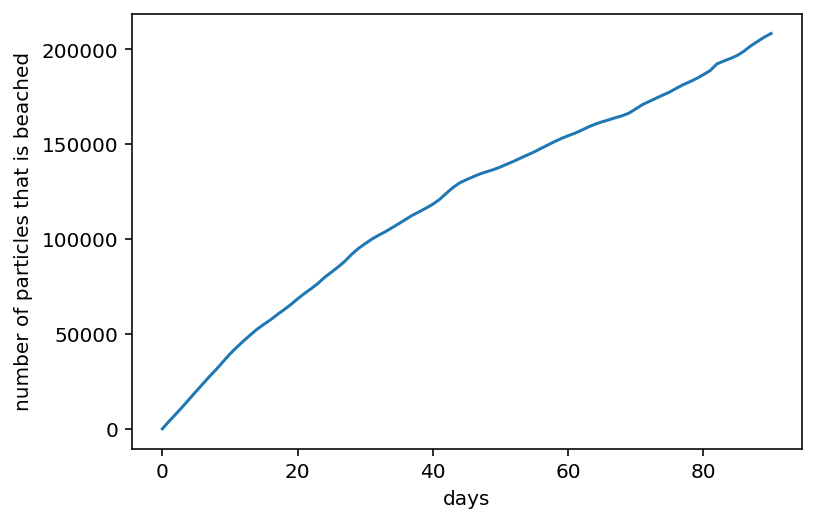

In [16]:
plt.plot(nBeach)
plt.xlabel('days')
plt.ylabel('number of particles that is beached')

Text(0, 0.5, 'number of times that particles have been unbeached')

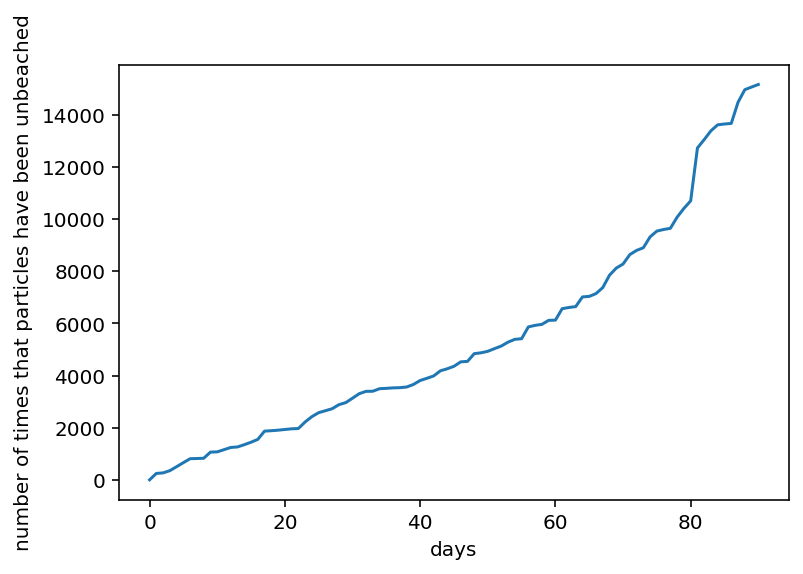

In [23]:
plt.plot(unbeachCount)
plt.xlabel('days')
plt.ylabel('number of times that particles have been unbeached')

(<Figure size 432x288 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f020156f4a8>)

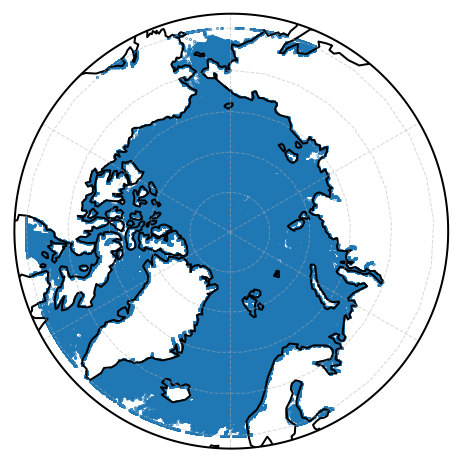

In [12]:
plot.scatter_from_dataset(pfile.lon[:,-1], pfile.lat[:,-1], polar=True, s=0.05, latRange=(58,90), lonRange=(-180,180))